In [1]:
from f_data_prep import *
from f_drosophila_infer import *

In [2]:
data_complete = np.loadtxt('../data_complete.txt')
data_bin = np.vsplit(data_complete, 6)
data_init = np.vstack([data_bin[i] for i in range(5)])
data_diff = make_data_diff(data_complete, 6)
data_diff_sum_sq = np.sum(np.abs(data_diff)**2, axis=0)

38 47
18 47
38 47


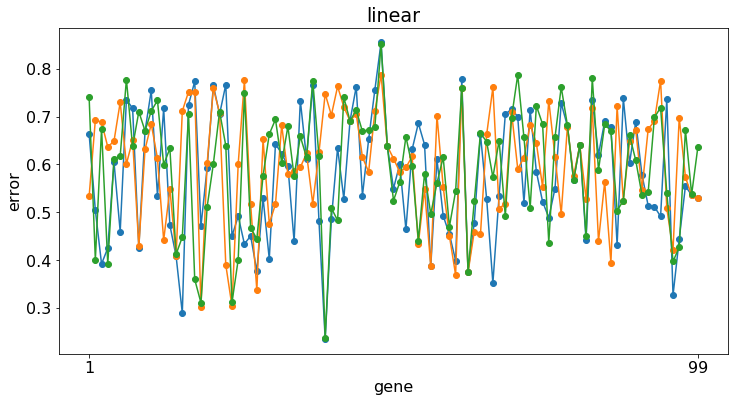

18 47
74 47
25 47


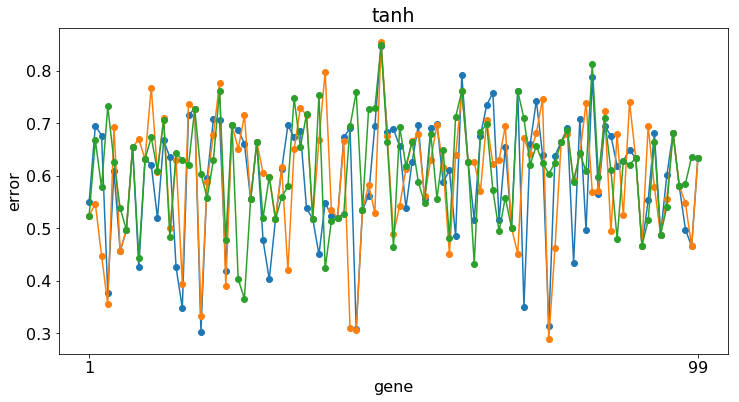

94 47
3 92
47 42


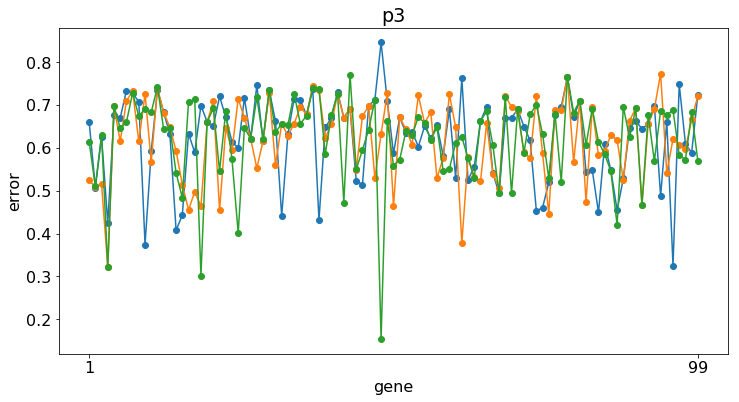

18 47
74 77
53 42


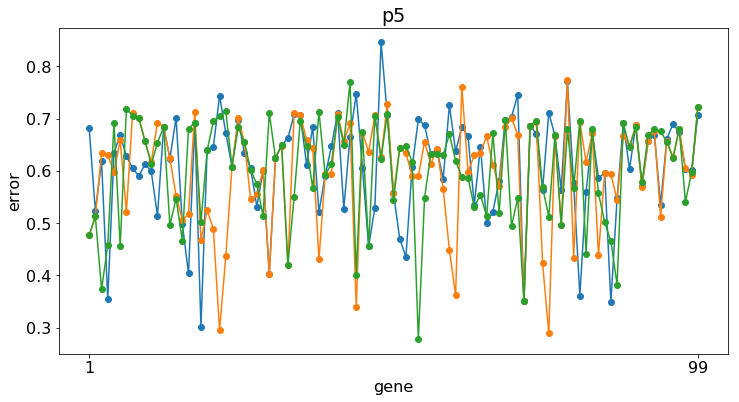

In [12]:
%matplotlib inline
function = ['linear', 'tanh', 'p3', 'p5']
for func in function:
    with open('./pickles/w_' + func + '.pkl', 'rb') as f:
        w = pickle.load(f)
    with open('./pickles/sigma_' + func + '.pkl', 'rb') as f:
        sigma = pickle.load(f)
    with open('./pickles/bias_' + func + '.pkl', 'rb') as f:
        bias = pickle.load(f)
    
    plt.figure(figsize=(12,6))  
    for i in range(3):
        error_v = []
        if func == 'linear':
            diff_pred = bias + data_init.dot(w) + sigma*npr.normal(size=(1,99))
        elif func == 'tanh':
            diff_pred = np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
        else:
            diff_pred = odd_power(bias + data_init.dot(w), int(list(func)[1])) + sigma*npr.normal(size=(1,99))

        error = np.sqrt(np.sum(np.abs(data_diff - diff_pred)**2, axis=0)/data_diff_sum_sq)
        for n in range(99):
            error_sign = accuracy_score(np.sign(data_diff[:,n]), np.sign(diff_pred[:,n]), normalize=True)
            error_v.append(error_sign)
        print(np.argmin(error_v), np.argmax(error_v))

        plt.rcParams.update({'font.size':16})
        plt.plot(range(99), error_v, 'o-')
        # plt.plot(range(99), error_test, 'o-')
        plt.xticks([0,98], ['1','99'])
        # plt.yticks([0, 2], ['0', '2'])
        plt.xlabel('gene')
        plt.ylabel('error')
        plt.title(func)
#         plt.ylim(0,35)

    plt.show()